In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def f(x):
    return 3 * x * x - 4 * x + 5

In [11]:
f(3.0)

20.0

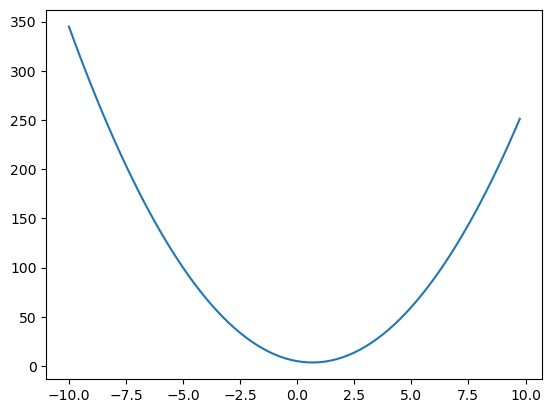

In [17]:
x_values = np.arange(-10, 10, 0.25)
y_values = f(x_values)
plt.plot(x_values, y_values)

In [18]:
h = 0.001
x = 3.0
der = (f(x + h) - f(x)) / h
der

14.00300000000243

In [1]:
# Complex Functions : 
a = 2.0
b = -3.0
c = 10.0
d = a * b + c
d

4.0

In [2]:
h = 0.001
(((a + h) * b + c) - (a * b + c)) / h

-3.0000000000001137

In [31]:
class Value :
    def __init__(self, data, _children = (), _op = "") :
        self.data = data
        self._prev = set(_children)
        self._op = _op

    def __repr__(self) :
        return f"Value (data = {self.data})"

    def __add__ (self, other) :
        return Value(self.data + other.data, (self, other), '+')

    def __mul__ (self, other) :
        return Value(self.data * other.data, (self, other), '*')
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

d = a * (b * c)
d

Value (data = 4.0)

In [37]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{data %.4f}" % (n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

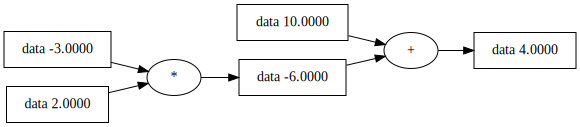

In [39]:
draw_dot(d)